# Lab 06 – demo notebook

<span style="color: red;">**Do not read through this notebook until after the Lab 06 invention activity in class.**</span>


💡 A summary of our **new statistic** for **goodness-of-fit testing** can be found in Appendix A, at the end of this notebook.

## 1. Load the libraries and the data to fit

In [1]:
# /!\ For VSCODE use only /!\

# importing os module  
import os 
# import pprint 
  
# Get the list of user's 
# env_var = os.environ 
  
# Print the list of user's 
# print("User's Environment variable:") 
# pprint.pprint(dict(env_var), width=1)

os.environ['JPY_SESSION_NAME'] = __vsc_ipynb_file__

In [2]:
%reset -f
%matplotlib widget
import data_entry2
import numpy as np
import matplotlib.pyplot as plt
import fit_plot


In [ ]:
# Load the data used for Prelab 05.
de1 = data_entry2.sheet_copy(
    "../../Lab05/prelab05_hookes_law", "demo_copy-prelab05_hookes_law"
    )

Copied ../../Lab05/prelab05_hookes_law.csv to demo_copy-prelab05_hookes_law.csv
Creating directory for backups:  csv_backups/
Creating undo file
Sheet name: demo_copy-prelab05_hookes_law.csv


## 2. Chi-square minimization (also known as *weighted least squares*)

**Chi-square minimization** (or **weighted least squares**) is a method used for finding the **best-fitting parameters** of a model when fitting data.

In the following code, adding the argument `chi2 = True` to `fit_plot.line` enables the `Chi2` output (note that `fit_plot.line` returns the **reduced chi-square** $\chi^2_\mathrm{red}$ as seen in class during the invention activity). 

Try to minimize the value for $\chi^2_\mathrm{red}$ using a combination of clicking within the scatter plot, within the residuals plot, and updating the values manually using the text boxes. You should be able to find a combination of parameters that gets you to a $\chi^2_\mathrm{red}$ value that is slightly below 0.5. You can also check the answer in the cell that follows the fitting widget. 

In [5]:
x_data = delta_xVec
y_data = f_sVec
del_y_data = del_f_sVec
del_x_data = del_delta_xVec
unique_graph_title = "Chi-square minimization for Prelab 05 data"

fit_plot.line(unique_graph_title, x_data, y_data, del_y_data, chi2=True)

AppLayout(children=(Canvas(header_visible=False, layout=Layout(grid_area='header'), toolbar=Toolbar(toolitems=…

#### Answer: best-fitting model parameters

The best-fitting parameters are `Slope = 2.08` and `Intercept = 0.0045`, which gives a $\chi^2_\mathrm{red}$ of 0.66.

## 3. Estimate the uncertainty in the slope using the reduced chi-square

Our new statistic for goodness-of-fit testing, $\chi^2_\mathrm{red}$, allows us to use an improved method to determine the uncertainty in the slope, which we will demonstrate below.

To find `slope_max` and `slope_min`, keep the `Intercept` value **fixed** at the one you found for the best-fitting line, and then adjust the `Slope` up and down (using the text box, not by clicking on the graph) to approximately double the value of $\chi^2_\mathrm{red}$ as compared to the one for the best fit. This provides the 68% Confidence Interval for the slope, which you can divide by 2 to get the standard uncertainty in the slope.

The steps:
1. The best estimate of your slope will be the one from your best-fitting model above with the lowest $\chi^2_\mathrm{red}$. In this example the best-fitting model is `Slope = 2.08 N/m` and `Intercept = 0.0045 m`, which corresponds to a $\chi^2_\mathrm{red}$ of 0.66.
2. While keeping `Intercept` fixed at `0.0045 m`, we adjust the `Slope` upward until our $\chi^2_\mathrm{red}$ is approximately $2 \times 0.66$, which is 1.32. Being within 5% of this value (so ~ 1.25 - 1.39) is precise enough so we can use `slope_max = 2.148 N/m`, which gives a $\chi^2_\mathrm{red}$ of 1.33. Notice how the residuals for this fit look consistent with how we have described `slope_max` in the past. 
3. Take the slope back to the `best_fit` value of `2.09 N/m` while continuing to keep `Intercept` fixed. Now we adjust the `Slope` downward until it gives a $\chi^2_\mathrm{red}$ of approximately 1.32. Here we find `slope_min = 2.013 N/m` corresponds to $\chi^2_\mathrm{red}$ = 1.32.
4. The best estimate of the standard uncertainty of the slope is half of the difference between `slope_max` and `slope_min` (the 68% Confidence Interval for the slope), where each of these slopes were found by adjusting the `Slope` until $\chi^2_\mathrm{red}$ doubled, approximately. We then additionally apply a factor of $1/\sqrt{N}$ to include the precision benefits of taking more measurements.

The code below details these calculations.

In [ ]:
# Calculate the uncertainty in the slope (all slope values correspond to a fit 
# using intercept = 0.0045 m).

slope_best = 2.08  # Chi2: 0.66
slope_max = 2.15  # Chi2: 1.33 (approximately 2*0.66)
slope_min = 2.013  # Chi2: 1.32 (approximately 2*0.66)
N = len(x_data)

del_slope = (slope_max - slope_min) / (2 * np.sqrt(N))

print("del_slope = " + str(del_slope))  # raw python result

# Advanced code for reporting a result in Python with the right number of 
# decimals (for the best value) and significant figures (for the uncertainty).

SIG_FIGS = 2  # constant in our class

print(f"Uncertainty in the slope: {del_slope:.{SIG_FIGS}} N/m")

decimal_count = len(f"{del_slope:.{SIG_FIGS}}".split(".")[1])

print(
    f"The best-fitting slope is: {slope_best:.{decimal_count}f}"
    f" ± {del_slope:.{SIG_FIGS}} N/m"
    )

del_slope = 0.025890566401132065
Uncertainty in the slope: 0.026 N/m
The best-fitting slope is: 2.080 ± 0.026 N/m


**Reporting results:** Our best estimate of the slope is 2.080 $\pm$ 0.026 N/m.

## 4. Scatter plot and residual plot with complete $\chi^2_\mathrm{red}$ analysis

In the code block below we make some small updates to our usual code for making nice plots. 
1. We add `P = 2` in "Scatter step 1" as the number of fitting parameters, and
2. At the end of the code block we add a new section "Calculate $\chi^2_\mathrm{red}$", which shows how easy it is to calculate $\chi^2_\mathrm{red}$ once you have already calculated your residuals. Recall that the $y_i - f(x_i)$ term in the $\chi^2_\mathrm{red}$ equation in Appendix A is how one calculates a residual.
   * This code prints out the `Slope` and `Intercept` from `fit_plot.line` and used for the best-fitting model parameters, and the resulting $\chi^2_\mathrm{red}$ for that choice of `Slope` and `Intercept`.

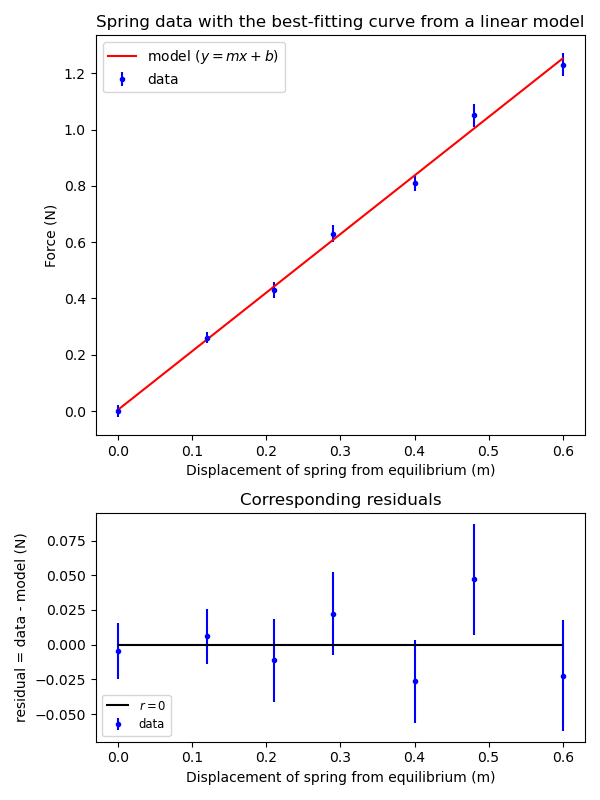

FIT REPORT
[Model]
    Linear model: y = mx + b
[Fit Statistics]
    # fitting method  : chi-square minimization
    # data points     : N = 7
    # parameters      : P = 2
    reduced chi-square = 0.66
[Parameters (best-fitting values)]
          slope: m = 2.080      ± 0.026     N/m   (1.24%)
    y-intercept: b = 0.0045                 N    


In [250]:
# LINEAR MODEL + CHI-SQUARE ANALYSIS

# Model – step 1: find the range of x values from the experimental data.
x_data = delta_xVec
y_data = f_sVec
del_y_data = del_f_sVec
del_x_data = del_delta_xVec
x_min = np.min(x_data)  # find the smallest x value
x_max = np.max(x_data)  # find the largest x value

# Model – step 2: generate an array of model x values between x_min and x_max
# for which we want to plot the model y values.
x_model = np.linspace(
    start=x_min, stop=x_max, num=200
    )  # return 200 evenly spaced values

# Model – step 3: calculate the model y values at each of the model x values.
# Choose best-fitting values for the linear model.
m = 2.08
b = 0.0045
y_model = m * x_model + b

# Model – step 4: plot the model on the graph of the experimental data.
# Create a figure and a set of subplots and reference them in the
# variables "fig" and "axs".
fig, axs = plt.subplots(
    nrows=2, ncols=1, squeeze=False,
    height_ratios=[1.75, 1], figsize=(6, 8)
    )  # do not change

data_label = "data"
graph_title = "Spring data with the best-fitting curve from a linear model"
x_label = "Displacement of spring from equilibrium (m)"
y_label = "Force (N)"
axs[0, 0].errorbar(
    x=x_data, y=y_data, yerr=del_y_data,
    fmt='bo', markersize=3, label=data_label
    )  # plot experimental data
axs[0, 0].set_title(graph_title)
axs[0, 0].set_xlabel(x_label)
axs[0, 0].set_ylabel(y_label)

model_label = "model ($y = mx + b$)"
axs[0, 0].plot(x_model, y_model, "r-", label=model_label)  # plot model data
# Add a legend (you can change the location as needed)
axs[0, 0].legend(loc='upper left')

# Residuals – step 1: calculate the model predictions y_prediction for each of
# the measured x_data values.
y_prediction = m * x_data + b

# Residuals – step 2: calculate the residuals.
residuals = y_data - y_prediction

# Residuals – step 3: plot the residuals against the measured x_data values.
residual_graph_title = "Corresponding residuals"
residual_y_label = "residual = data - model (N)"
axs[1, 0].errorbar(
    x=x_data, y=residuals, yerr=del_y_data,
    fmt='bo', markersize=3, label=data_label
    )
axs[1, 0].set_title(residual_graph_title)
axs[1, 0].set_xlabel(x_label)  # reuse the x-label from the scatter plot
axs[1, 0].set_ylabel(residual_y_label)

# Residuals – step 4: add a horizontal line at r=0 to the plot.
axs[1, 0].hlines(y=0, xmin=x_min, xmax=x_max, color='k', label="$r = 0$")
# Add a legend (you can change the location as needed)
axs[1, 0].legend(loc='lower left', fontsize='small')

plt.tight_layout()  # adjust the padding between and around subplots
plt.show()


# Summary of chi-square minimization analysis.

# Report the values from your estimate of the uncertainty in the slope using
# the fit_plot.line widget and doubling the reduced chi-square.
m_max = 2.15  # slope_max
m_min = 2.013  # slope_min
N = len(x_data)

# Calculate the uncertainty in the slope.
del_m = (m_max - m_min) / (2 * np.sqrt(N))

# Define the number of fitting parameters ("P" in the reduced chi-square
# formula).
number_params = 2  # slope and y-intercept

# Calculate the reduced chi-square.
reduced_chi_square = 1 / (len(residuals) - number_params) * np.sum(
    (residuals / del_y_data)**2
    )

# Advanced code for creating a fit report in Python with the right number of 
# decimals (for the best value) and significant figures (for the uncertainty).
# Note that in the printed report, the number in parentheses next to the
# uncertainty in the slope is the associated relative uncertainty
# (expressed as a percentage).

# You should not need to have to modify this part of the code.

SIG_FIGS = 2  # constant in our class
m_decimal_count = len(f"{del_m:.{SIG_FIGS}}".split(".")[1])

print("FIT REPORT")
print("[Model]")
print(f"{'':<4}""Linear model: y = mx + b")
print("[Fit Statistics]")
print(f"{'':<4}{'# fitting method':<18}: chi-square minimization")
print(f"{'':<4}{'# data points':<18}{': N = ' + str(N):<5}")
print(f"{'':<4}{'# parameters':<18}{': P = ' + str(number_params):<5}")
print(f"{'':<4}"f"reduced chi-square = {reduced_chi_square:.{SIG_FIGS}f}")
print("[Parameters (best-fitting values)]")
print(
    f"{'':<4}{'slope: m = ':>17}{m:<10.{m_decimal_count}f}{' ± ':<3}"
    f"{del_m:<10.{SIG_FIGS}}{'N/m':<5} ({del_m / m * 100:.{SIG_FIGS}f}%)"
    )
print(f"{'':<4}{'y-intercept: b = ':>17}{b:<10}{'':<3}{'':<10}{'N':<5}")

# Appendix A: $\chi^2_\mathrm{red}$ minimization (weighted least squares fitting) to find the best-fitting parameters

$$\large \chi^2_\mathrm{red} = \frac{1}{N-P} \sum_{i=1}^N \left[ \frac{y_i - f(x_i) }{\delta y_i} \right]^2$$

We use $\chi^2_\mathrm{red}$ to help us find the **best possible fit** of the model to the data. To do so we adjust the fitting parameters to find the lowest possible value for $\chi^2_\mathrm{red}$.

Interpreting $\large \chi^2_\mathrm{red}$:

* $\large \chi^2_\mathrm{red} \approx 1$: The model fits the data well, assuming uncertainties have been characterized well
* $\large \chi^2_\mathrm{red} \gg 1$: Not a good fit or the uncertainties have been underestimated
* $\large \chi^2_\mathrm{red} \ll 1$: The uncertainties have been overestimated

Using $\chi^2_\mathrm{red}$ is a 2-step process:
1. First minimize $\chi^2_\mathrm{red}$ by adjusting parameters.
2. Then, once it is minimized, interpret the value. 

The goal is **not** to make $\chi^2_\mathrm{red}$ = 1, it is to minimize it to find the best possible fit, and then interpret the resulting $\chi^2_\mathrm{red}$ value